In [7]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from os.path import join as pjoin
from glob import glob
import numpy as np
import pandas as pd

import cv2
print('OpenCV version used:', cv2.__version__)
from skimage import data as skimages

import seaborn as sns
sns.set_style('darkgrid')
from matplotlib import pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15,15)
mpl.rcParams['image.cmap'] = 'inferno'

from utils import imread, imshow

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
OpenCV version used: 4.1.0


# Affine transformation from 3 points

In [8]:
import numpy as np
import cv2
from skimage import io
from matplotlib import pyplot as plt

def url_to_image(url):
    print("downloading %s" % (url))
    return io.imread(url)

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/view.jpg
OpenCV:
[[ 0.91666667 -0.08333333 50.        ]
 [ 0.08333333  0.91666667  0.        ]]
Implemented:
[[ 0.91666667 -0.08333333 50.        ]
 [ 0.08333333  0.91666667  0.        ]]


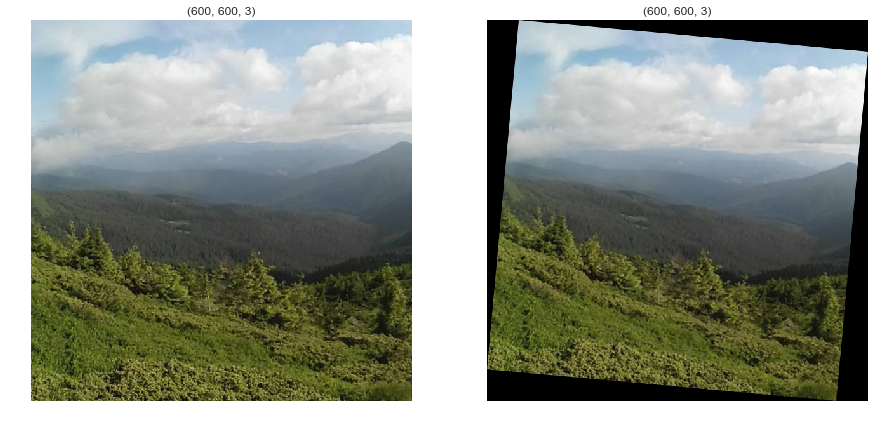

In [15]:
url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/view.jpg"
img = url_to_image(url)

(r,c) = img.shape[:2]
pts1 = np.float32([[0,0],[r,0],[0,c]])
pts2 = np.float32([[50,0],[r,50],[0,c-50]])

M = cv2.getAffineTransform(pts1, pts2)
print('OpenCV:')
print(M)

def getAffineTransform(pts1, pts2):
    return pts2.T.dot(np.linalg.inv(np.vstack((pts1.T, np.ones((1,3))))))

M2 = getAffineTransform(pts1, pts2)
print('Implemented:')
print(M2)

dst = cv2.warpAffine(img, M2, img.shape[:2])
imshow(img, sub=(1,2,1))
imshow(dst, sub=(1,2,2))

# Projective transformation from 4 points

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/cvbook.jpg
OpenCV:
[[ 7.53496708e-01  2.67479949e-01 -1.83197586e+02]
 [-3.99227991e-02  8.41850329e-01  4.57029261e+00]
 [ 3.03922821e-04  6.21097907e-04  1.00000000e+00]]
Implemented:
[[ 7.53496708e-01  2.67479949e-01 -1.83197586e+02]
 [-3.99227991e-02  8.41850329e-01  4.57029261e+00]
 [ 3.03922821e-04  6.21097907e-04  1.00000000e+00]]


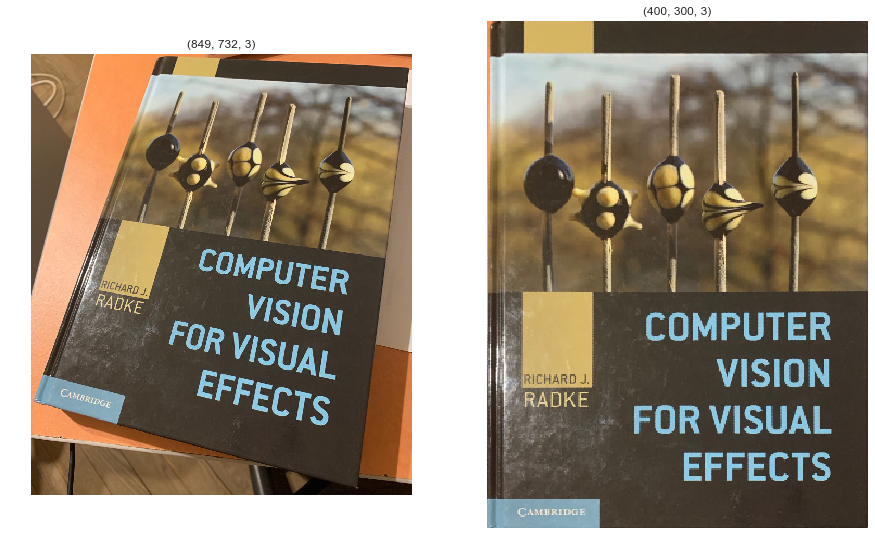

In [20]:
url = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/images/cvbook.jpg"
img = url_to_image(url)
(r,c) = img.shape[:2]

pts1 = np.float32([[241,6],[726,29],[6,668],[627,837]])
pts2 = np.float32([[0,0],[300,0],[0,400],[300,400]])


M = cv2.getPerspectiveTransform(pts1, pts2)
print('OpenCV:')
print(M)

def getPerspectiveTransform(pts1, pts2):
    x1, y1 = pts1[0]
    x2, y2 = pts1[1]
    x3, y3 = pts1[2]
    x4, y4 = pts1[3]

    x1_, y1_ = pts2[0]
    x2_, y2_ = pts2[1]
    x3_, y3_ = pts2[2]
    x4_, y4_ = pts2[3]

    A = np.linalg.solve(
        np.array([
            [-x1, -y1, 0, 0, 0, 0, -1, 0, 0, x1_, 0, 0, 0],
            [0, 0, -x1, -y1, 0, 0, 0, -1, 0, y1_, 0, 0, 0],
            [0, 0, 0, 0, -x1, -y1, 0, 0, -1,   1, 0, 0, 0],
            [-x2, -y2, 0, 0, 0, 0, -1, 0, 0, 0, x2_, 0, 0],
            [0, 0, -x2, -y2, 0, 0, 0, -1, 0, 0, y2_, 0, 0],
            [0, 0, 0, 0, -x2, -y2, 0, 0, -1, 0,   1, 0, 0],
            [-x3, -y3, 0, 0, 0, 0, -1, 0, 0, 0, 0, x3_, 0],
            [0, 0, -x3, -y3, 0, 0, 0, -1, 0, 0, 0, y3_, 0],
            [0, 0, 0, 0, -x3, -y3, 0, 0, -1, 0, 0,   1, 0],
            [-x4, -y4, 0, 0, 0, 0, -1, 0, 0, 0, 0, 0, x4_],
            [0, 0, -x4, -y4, 0, 0, 0, -1, 0, 0, 0, 0, y4_],
            [0, 0, 0, 0, -x4, -y4, 0, 0, -1, 0, 0, 0,   1],
            [0, 0, 0, 0,   0,   0, 0, 0,  0, 1, 0, 0,   0],
            ]), np.append(np.zeros((12)), 1)
    )
    return np.array([[A[0], A[1], A[6]],
                     [A[2], A[3], A[7]],
                     [A[4], A[5], A[8]]]) / (A[8] + 1e-10)

M2 = getPerspectiveTransform(pts1, pts2)
print('Implemented:')
print(M2)
dst = cv2.cv2.warpPerspective(img,M2,(300, 400))
imshow(img, sub=(1,2,1))
imshow(dst, sub=(1,2,2))

# Patch Match Algorithm